In [1]:
import tensorflow as tf

In [2]:
#创建两个常量，矩阵乘法 会话并执行
m1 = tf.constant([[3,3]])
m2 = tf.constant([[2],[3]])
product = tf.matmul(m1,m2)
with tf.Session() as sess:
    res = sess.run(product)
    print(res)

[[15]]


In [3]:
#创建变量，矩阵加减，变量初始化
v1 = tf.Variable([1,2])
m3 = tf.constant([3,3])

sub = tf.subtract(v1,m3)
add = tf.add(v1,sub)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(sub))
    print(sess.run(add))

[-2 -1]
[-1  1]


In [4]:
#创建初始化变量
state = tf.Variable(0,name='counter')
#创建加法op，使state加一
new_state = tf.add(state,1)
#tf中不能单纯使用=赋值，创建赋值op
update_state = tf.assign(state,new_state)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(state))
    for _ in range(5):
        sess.run(update_state)
        print(sess.run(state))

0
1
2
3
4
5


In [23]:
#fetch :同时执行多个OP
input1 = tf.constant(2.0)
input2 = tf.constant(3.0)
input3 = tf.constant(4.0)
add = tf.add(input1,input2)
mul = tf.multiply(input3,add)
 
with tf.Session() as sess:
    res = sess.run([add,mul])
    print(res)

[5.0, 20.0]


In [6]:
#feed : 创建占位符
input4 = tf.placeholder(tf.float32) # placeholder:表示创建占位符
input5 = tf.placeholder(tf.float32)
output = tf.multiply(input4,input5)

with tf.Session() as sess:
    #占位符输入值需要采用字典的形式
    res = sess.run(output,feed_dict = {input4:[7.0],input5:[5.0]})
    print(res)

[35.]


In [7]:
#利用tf完成线性回归模型
#随机生成100个点
import numpy as np
x_data = np.random.rand(100)
y_data = x_data*0.1+0.2

#构造线性模型需要的变量
k = tf.Variable(0.)
b = tf.Variable(0.)
y = k*x_data+b

#定义损失，优化器(利用梯度下降法,实际上就是定义一个学习率)和最小化代价
loss = tf.reduce_mean(tf.square(y_data-y))
optimizer = tf.train.GradientDescentOptimizer(0.2)
train = optimizer.minimize(loss)

#定义梯度下降迭代201次，每20次打印一次
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(201):
        sess.run(train)
        if step%20==0:
            print(step,sess.run([k,b]))

0 [0.0558221, 0.10072829]
20 [0.10481107, 0.1973183]
40 [0.10271966, 0.1984841]
60 [0.1015374, 0.19914308]
80 [0.10086908, 0.19951558]
100 [0.100491285, 0.19972616]
120 [0.100277714, 0.19984521]
140 [0.10015699, 0.1999125]
160 [0.10008874, 0.19995055]
180 [0.100050166, 0.19997203]
200 [0.10002836, 0.1999842]


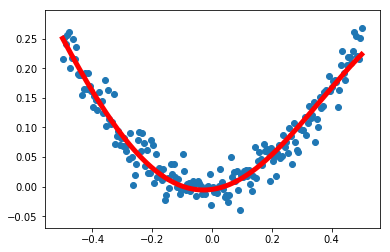

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
#利用tf实现线性回归的神经网络

#生成200个随机点
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data)+noise

#定义两个占位符
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

#定义神经网络中间层
weights_L1 = tf.Variable(tf.random_normal([1,10]))
bias_L1 = tf.Variable(tf.zeros([1,10]))
wx_plus_L1 = tf.matmul(x,weights_L1) + bias_L1
L1 = tf.nn.tanh(wx_plus_L1)

#定义神经网络输出层
weights_L2 = tf.Variable(tf.random_normal([10,1]))
bias_L2 = tf.Variable(tf.zeros([1,1]))
wx_plus_L2 = tf.matmul(L1,weights_L2)+bias_L2
prediction = tf.nn.tanh(wx_plus_L2)

#定义损失，优化器(利用梯度下降法,实际上就是定义一个学习率)和最小化代价
loss = tf.reduce_mean(tf.square(y-prediction))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()

In [9]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [13]:
#载入数据库
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

#每个批次的大小(表示每一次放入神经网络的图片数)
batch_size = 100
#计算一共有多少的批次
n_batch = mnist.train.num_examples//batch_size

#定义两个占位符
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

#创建一个神经网络
W = tf.Variable(tf.zeros([784,50]))
b = tf.Variable(tf.zeros([50]))
prediction1 = tf.nn.tanh(tf.matmul(x,W)+b)
# prediction1 = tf.matmul(x,W)+b

W1 = tf.Variable(tf.random_normal([50,10]))
b1 = tf.Variable(tf.zeros([10]))
prediction = tf.matmul(prediction1,W1)+b1

#二次代价
# loss = tf.reduce_mean(tf.square(y-prediction))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=prediction))

train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

init = tf.global_variables_initializer()

#结果存放在布尔类型列表中（argmax返回一维张量中最大的值所在的位置）
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))

#把布尔类型转化成成0，1模式
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(21):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys})
        
        acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print('iter '+str(epoch)+'  ,testing accuracy: '+str(acc))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
iter 0  ,testing accuracy: 0.9305
iter 1  ,testing accuracy: 0.941
iter 2  ,testing accuracy: 0.947
iter 3  ,testing accuracy: 0.9528
iter 4  ,testing accuracy: 0.9551
iter 5  ,testing accuracy: 0.9529
iter 6  ,testing accuracy: 0.9591
iter 7  ,testing accuracy: 0.9593
iter 8  ,testing accuracy: 0.96
iter 9  ,testing accuracy: 0.9599
iter 10  ,testing accuracy: 0.9608
iter 11  ,testing accuracy: 0.9558
iter 12  ,testing accuracy: 0.9618
iter 13  ,testing accuracy: 0.9613
iter 14  ,testing accuracy: 0.9638
iter 15  ,testing accuracy: 0.9607
iter 16  ,testing accuracy: 0.9624
iter 17  ,testing accuracy: 0.9638
iter 18  ,testing accuracy: 0.9628
iter 19  ,testing accuracy: 0.9642
iter 20  ,testing accuracy: 0.9649


In [16]:
#利用dropout，防止过拟合
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

#每个批次的大小(表示每一次放入神经网络的图片数)
batch_size = 100
#计算一共有多少的批次
n_batch = mnist.train.num_examples//batch_size

#定义两个占位符
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])
keep_drop = tf.placeholder(tf.float32) #定义每一层处于工作状态的神经元占比
lr = tf.Variable(0.001,dtype=tf.float32)

#创建一个神经网络
W1 = tf.Variable(tf.truncated_normal([784,500],stddev=0.1)) #初始化的一种迭代方式，标准差置为0.1
b1 = tf.Variable(tf.zeros([500])+0.1)
L1 = tf.nn.tanh(tf.matmul(x,W1)+b1)
L1_drop = tf.nn.dropout(L1,keep_drop)

W2 = tf.Variable(tf.truncated_normal([500,300],stddev=0.1)) #初始化的一种迭代方式，标准差置为0.1
b2 = tf.Variable(tf.zeros([300])+0.1)
L2 = tf.nn.tanh(tf.matmul(L1_drop,W2)+b2)
L2_drop = tf.nn.dropout(L2,keep_drop)

W3 = tf.Variable(tf.random_normal([300,10]))
b3 = tf.Variable(tf.zeros([10]))
prediction = tf.matmul(L2_drop,W3)+b3

#交叉熵代价函数
# loss = tf.reduce_mean(tf.square(y-prediction))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=prediction))

train_step = tf.train.AdamOptimizer(lr).minimize(loss)

init = tf.global_variables_initializer()

#结果存放在布尔类型列表中（argmax返回一维张量中最大的值所在的位置）
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))

#把布尔类型转化成成0，1模式
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(26):
        sess.run(tf.assign(lr,0.01*(0.95**epoch)))
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys,keep_drop:1.0})
        
        test_acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels,keep_drop:1.0})
        train_acc = sess.run(accuracy,feed_dict={x:mnist.train.images,y:mnist.train.labels,keep_drop:1.0})
        print('iter '+str(epoch)+'  ,testing accuracy: '+str(test_acc)+'  ,training accuracy: '+str(train_acc))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
iter 0  ,testing accuracy: 0.9126  ,training accuracy: 0.91465455
iter 1  ,testing accuracy: 0.928  ,training accuracy: 0.9322909
iter 2  ,testing accuracy: 0.9252  ,training accuracy: 0.92767274
iter 3  ,testing accuracy: 0.9233  ,training accuracy: 0.9298364
iter 4  ,testing accuracy: 0.9245  ,training accuracy: 0.9283636
iter 5  ,testing accuracy: 0.9317  ,training accuracy: 0.93856364
iter 6  ,testing accuracy: 0.9249  ,training accuracy: 0.9331273
iter 7  ,testing accuracy: 0.9333  ,training accuracy: 0.9387091
iter 8  ,testing accuracy: 0.9423  ,training accuracy: 0.94823635
iter 9  ,testing accuracy: 0.9497  ,training accuracy: 0.95354545
iter 10  ,testing accuracy: 0.9425  ,training accuracy: 0.9484182
iter 11  ,testing accuracy: 0.9486  ,training accuracy: 0.9562909
iter 12  ,testing ac

In [12]:
#载入数据库
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

#每个批次的大小(表示每一次放入神经网络的图片数)
batch_size = 100
#计算一共有多少的批次
n_batch = mnist.train.num_examples//batch_size

#定义两个占位符
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

#创建一个神经网络
W = tf.Variable(tf.zeros([784,50]))
b = tf.Variable(tf.zeros([50]))
prediction1 = tf.nn.tanh(tf.matmul(x,W)+b)
# prediction1 = tf.matmul(x,W)+b

W1 = tf.Variable(tf.random_normal([50,10]))
b1 = tf.Variable(tf.zeros([10]))
prediction = tf.matmul(prediction1,W1)+b1

#二次代价
# loss = tf.reduce_mean(tf.square(y-prediction))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=prediction))

# train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)
train_step = tf.train.AdamOptimizer(1e-2).minimize(loss)

init = tf.global_variables_initializer()

#结果存放在布尔类型列表中（argmax返回一维张量中最大的值所在的位置）
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))

#把布尔类型转化成成0，1模式
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(21):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys})
        
        acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print('iter '+str(epoch)+'  ,testing accuracy: '+str(acc))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
iter 0  ,testing accuracy: 0.9462
iter 1  ,testing accuracy: 0.9562
iter 2  ,testing accuracy: 0.9585
iter 3  ,testing accuracy: 0.9622
iter 4  ,testing accuracy: 0.9576
iter 5  ,testing accuracy: 0.957
iter 6  ,testing accuracy: 0.9607
iter 7  ,testing accuracy: 0.9525
iter 8  ,testing accuracy: 0.9598
iter 9  ,testing accuracy: 0.9624
iter 10  ,testing accuracy: 0.9613
iter 11  ,testing accuracy: 0.9628
iter 12  ,testing accuracy: 0.9649
iter 13  ,testing accuracy: 0.9635
iter 14  ,testing accuracy: 0.9637
iter 15  ,testing accuracy: 0.9627
iter 16  ,testing accuracy: 0.9651
iter 17  ,testing accuracy: 0.9653
iter 18  ,testing accuracy: 0.9616
iter 19  ,testing accuracy: 0.9618
iter 20  ,testing accuracy: 0.964


In [22]:
#利用tensorboard绘制网络结构
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

#每个批次的大小(表示每一次放入神经网络的图片数)
batch_size = 100
#计算一共有多少的批次
n_batch = mnist.train.num_examples//batch_size

#定义命名空间
with tf.name_scope('input'):
    #定义两个占位符
    x = tf.placeholder(tf.float32,[None,784],name='x-input')
    y = tf.placeholder(tf.float32,[None,10],name='y-input')

#创建一个神经网络
# W = tf.Variable(tf.zeros([784,50]))
# b = tf.Variable(tf.zeros([50]))
# prediction1 = tf.nn.tanh(tf.matmul(x,W)+b)
# prediction1 = tf.matmul(x,W)+b

# W1 = tf.Variable(tf.random_normal([50,10]))
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
prediction = tf.matmul(x,W)+b

#二次代价
# loss = tf.reduce_mean(tf.square(y-prediction))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=prediction))

train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)
# train_step = tf.train.AdamOptimizer(1e-2).minimize(loss)

init = tf.global_variables_initializer()

#结果存放在布尔类型列表中（argmax返回一维张量中最大的值所在的位置）
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))

#把布尔类型转化成成0，1模式
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter('logs/',sess.graph)
    for epoch in range(1):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys})
        
        acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print('iter '+str(epoch)+'  ,testing accuracy: '+str(acc))
        
        
#利用tensorboard --logdir 路径(logs文件夹的路径)  获取地址查看graph

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
iter 0  ,testing accuracy: 0.9101
